In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import os

path = os.listdir('brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [5]:
np.unique(Y)

array([0, 1])

In [6]:
pd.Series(Y).value_counts()

1    827
0    395
Name: count, dtype: int64

In [7]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

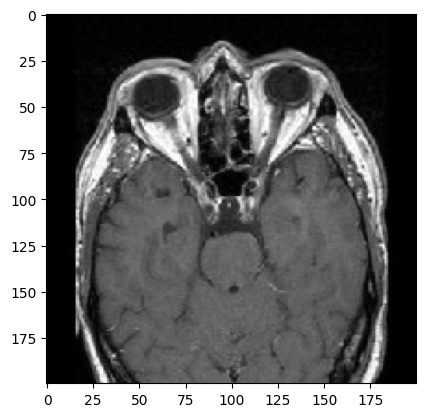

In [8]:
plt.imshow(X[0], cmap='gray')

### Prepare data

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X_updated, Y, random_state=42, test_size=0.2)

In [11]:
x_train.shape, x_test.shape

((977, 40000), (245, 40000))

In [12]:
print(x_train.max(), x_train.min())
print(x_test.max(), x_test.min())
x_train = x_train/255
x_test = x_test/255
print(x_train.max(), x_train.min())
print(x_test.max(), x_test.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
from sklearn.decomposition import PCA

In [14]:
print(x_train.shape, x_test.shape)
pca = PCA(0.98)
pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(x_test)

(977, 40000) (245, 40000)


In [15]:
print("Transformed shapes:", pca_train.shape, pca_test.shape)
print("Number of components:", pca.n_components_)
print("Number of features:", pca.n_features_in_)

Transformed shapes: (977, 611) (245, 611)
Number of components: 611
Number of features: 40000


### Train Model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [17]:
# import warnings
# warnings.filterwarnings('ignore')

# lg = LogisticRegression(C=0.1)
# lg.fit(x_train, y_train)
logistic_regression = LogisticRegression()


logistic_regression.fit(x_train, y_train)

# Predict on the test set
y_pred = logistic_regression.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.93


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
sv = SVC()
sv.fit(x_train, y_train)

SVC()

### Evaluation

In [20]:
print("Training Score:", logistic_regression.score(x_train, y_train))
print("Testing Score:", logistic_regression.score(x_test, y_test))

Training Score: 1.0
Testing Score: 0.9306122448979591


In [21]:
print("Training Score:", sv.score(x_train, y_train))
print("Testing Score:", sv.score(x_test, y_test))

Training Score: 0.9897645854657113
Testing Score: 0.9387755102040817


In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred = random_forest.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


In [28]:
pred = sv.predict(x_test)

In [29]:
misclassified=np.where(y_test!=pred)
misclassified

(array([ 20,  38,  40,  47,  81,  91,  95,  98, 102, 106, 138, 148, 149,
        189, 191], dtype=int64),)

In [30]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],y_test[36])

Total Misclassified Samples:  15
1 1


### TEST MODEL

In [31]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

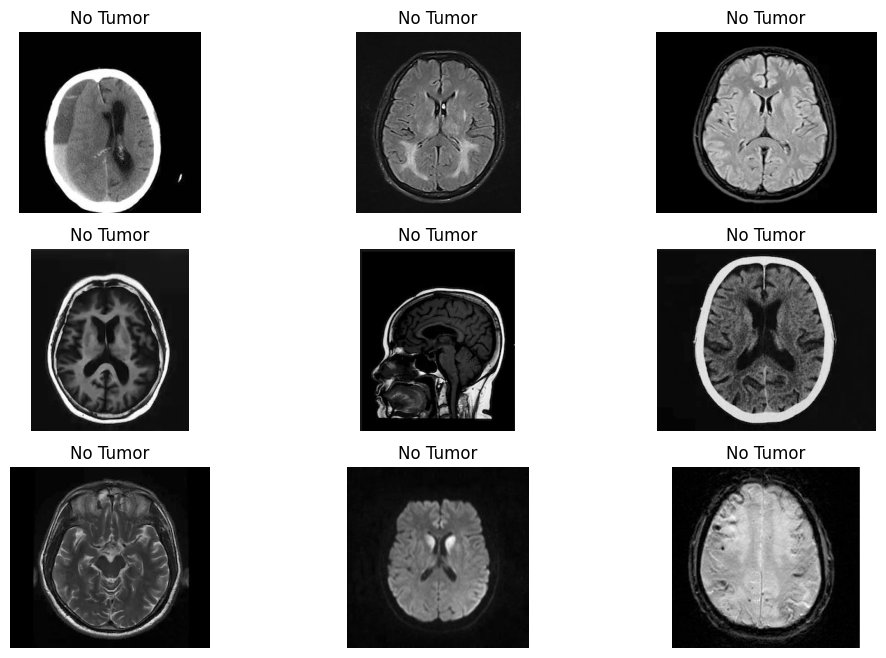

In [32]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('brain_tumor/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

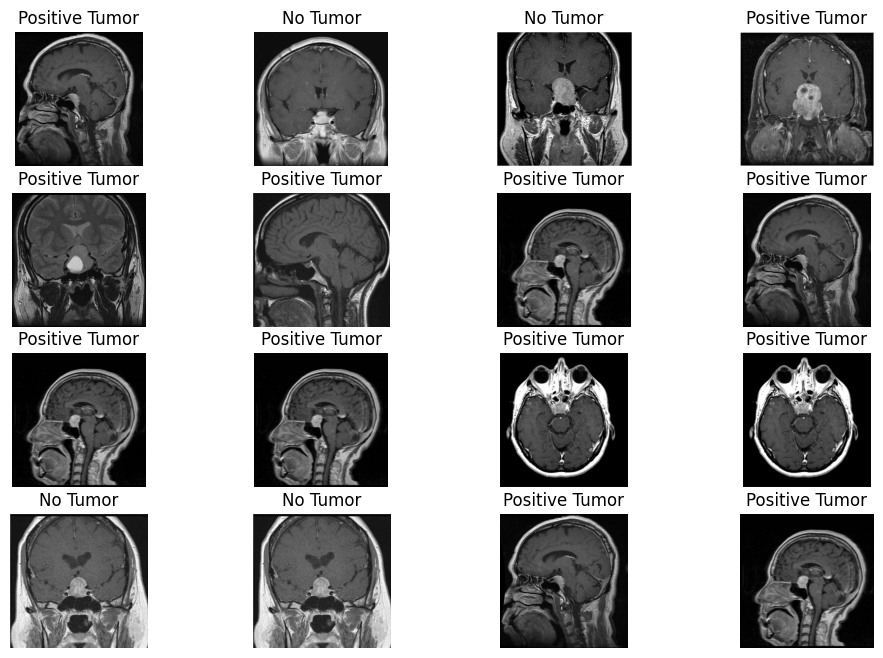

In [33]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [38]:
import joblib
joblib.dump(sv, 'svm_model.pkl', compress=9)

['svm_model.pkl']

In [40]:
import joblib
joblib.dump(random_forest, 'random_model.pkl',compress=9)

['random_model.pkl']

In [42]:
import joblib
joblib.dump(knn, 'knn_model.pkl',compress=9)

['knn_model.pkl']

In [41]:
import os

file_size = os.path.getsize('random_model.pkl')
print(f"File size: {file_size / (1024 * 1024):.2f} MB")


File size: 0.06 MB


In [43]:
import os

file_size = os.path.getsize('knn_model.pkl')
print(f"File size: {file_size / (1024 * 1024):.2f} MB")


File size: 40.51 MB
